In [ ]:
# Task 4: Conceptual Questions
'''
Ques.1> What is entropy and information gain?
Ans.> Entropy is a measure of impurity or disorder in a dataset. The more mixed the class labels, the higher the entropy.
Information gain measures the reduction in entropy after a dataset is split on a feature. 
It helps identify the best feature to split the data in a decision tree.

Ques.2> Explain the difference between Gini Index and Entropy.
Ans.> Both are impurity measures used in decision trees.

Gini Index calculates the probability of misclassifying a randomly chosen element.

Entropy uses a logarithmic function to measure disorder.
They often give similar results, but Gini is slightly faster as it doesn't require computing logs.

Ques.3> How can a decision tree overfit? How can this be avoided?
Ans.> Decision trees overfit when they become too deep and perfectly fit training data, capturing noise.
To prevent overfitting, limit tree complexity using parameters like max_depth, min_samples_split, or apply pruning techniques.'''

In [ ]:
# Task 5: Decision Tree on Titanic Dataset
import pandas as pd
# Load Titanic dataset from seaborn
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Drop columns with too many missing values or irrelevant info
df = df.drop(columns=['deck', 'embark_town', 'alive', 'who'])

# Drop rows with missing age or embarked
df = df.dropna(subset=['age', 'embarked'])
df['embarked'] = df['embarked'].fillna('S')
df['age'] = df['age'].fillna(df['age'].median())

# Encode categorical features
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns
df = df.drop(columns=['class', 'adult_male'])
df = df.dropna()  # ensure clean dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,0,False
1,1,1,1,38.0,1,0,71.2833,1,False
2,1,3,1,26.0,0,0,7.9250,0,True
3,1,1,1,35.0,1,0,53.1000,0,False
4,0,3,0,35.0,0,0,8.0500,0,True


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and target
X = df.drop(columns='survived')
y = df['survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6853146853146853
Confusion Matrix:
 [[61 19]
 [26 37]]


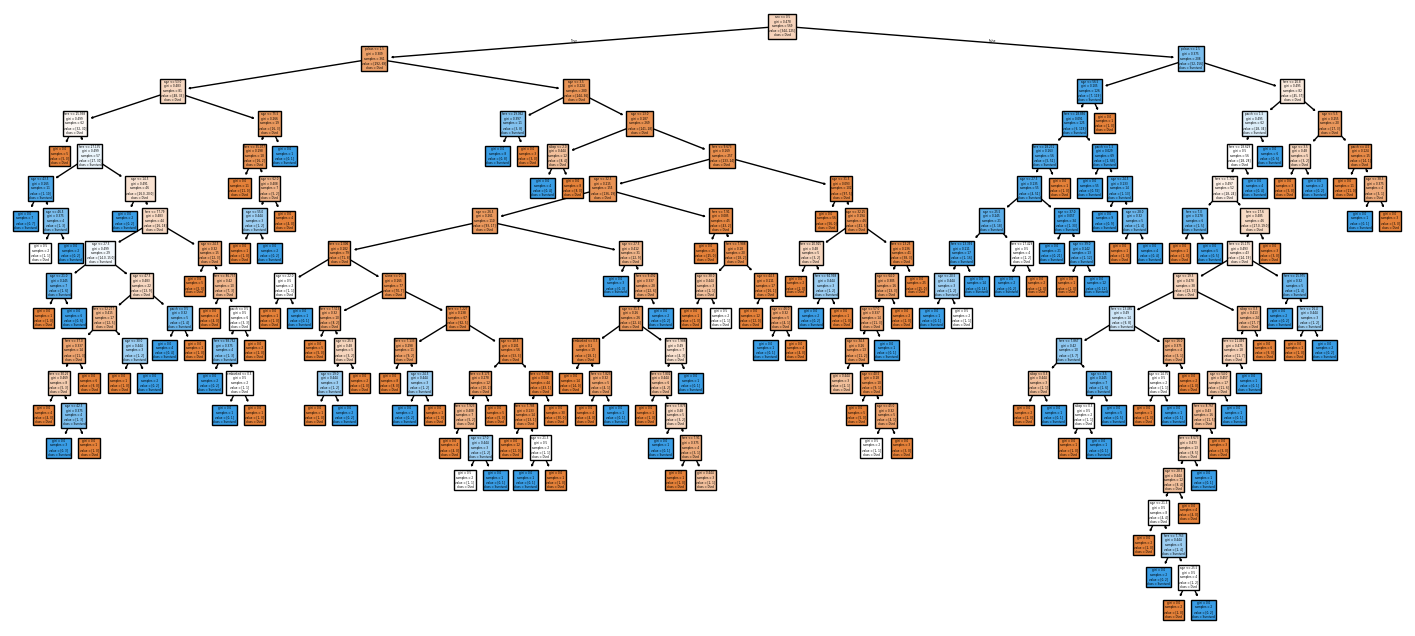

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()

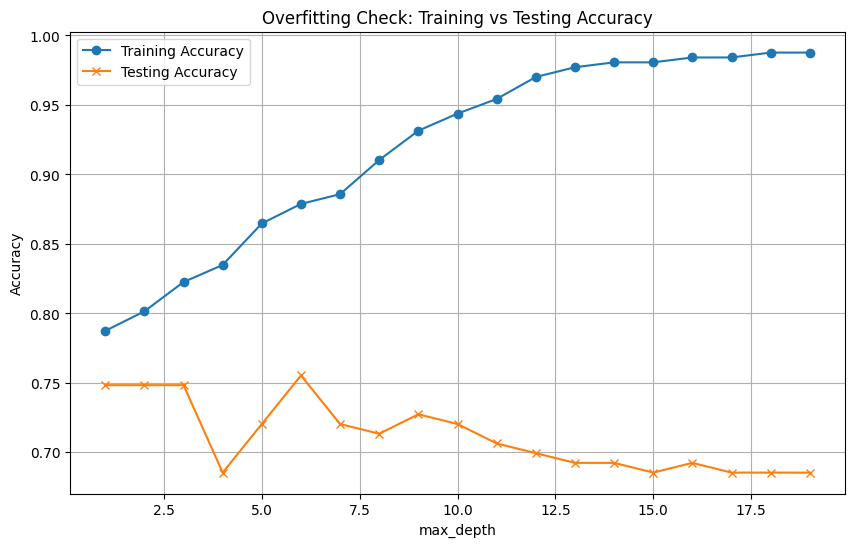

In [7]:
# Task 6: Model Tuning and Overfitting
import numpy as np
import matplotlib.pyplot as plt

depths = range(1, 20)
train_accuracies = []
test_accuracies = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot
plt.figure(figsize=(10,6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Testing Accuracy", marker='x')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Check: Training vs Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()

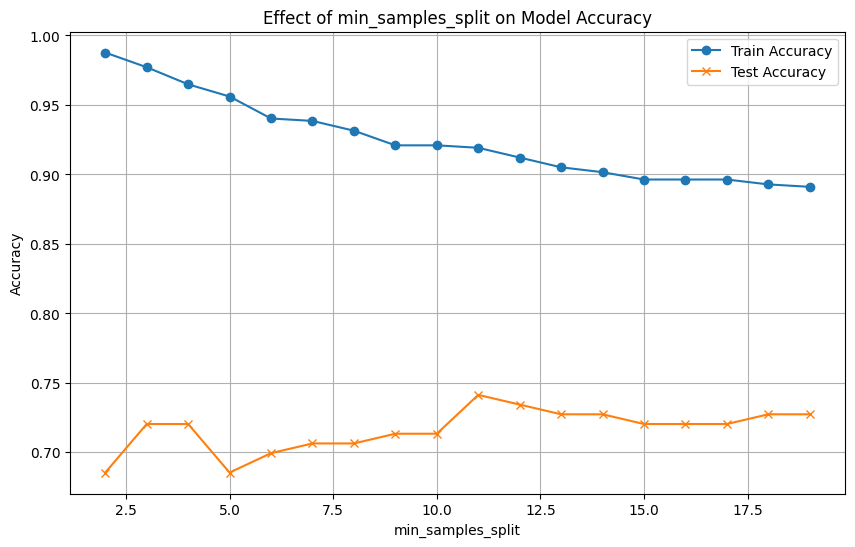

In [8]:
samples = range(2, 20)
train_acc = []
test_acc = []

for s in samples:
    clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

# Plot
plt.figure(figsize=(10,6))
plt.plot(samples, train_acc, label="Train Accuracy", marker='o')
plt.plot(samples, test_acc, label="Test Accuracy", marker='x')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Effect of min_samples_split on Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()